## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [51]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [43]:
df=pd.read_csv("students-data.csv", sep=";" )
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [44]:
df['Number']=df.index
df.set_index('Number', inplace=True)
df.sample(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
Number,,,,,,,,,,,,,,,,,,,,,
179,GP,M,17,U,GT3,T,4,3,other,other,...,5,2,3,1,1,2,4,10,10,11
370,MS,F,19,U,LE3,T,3,2,services,services,...,3,2,2,1,1,3,4,7,7,9
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
109,GP,F,16,U,LE3,T,4,4,health,health,...,5,4,5,1,1,4,4,14,15,16
23,GP,M,16,U,LE3,T,2,2,other,other,...,5,4,4,2,4,5,0,13,13,12


## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [11]:
df.select_dtypes(exclude='object').head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
Number,,,,,,,,,,,,,,,,
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10


## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [46]:
for col in df.columns:
    if df[col].dtypes=="int64":
        if df[col].var() < 1:
            df = df.drop(columns=[col], axis=1, inplace=True)
df.var()

age          1.628285
Medu         1.198445
Fedu         1.184180
goout        1.239388
Walc         1.658678
health       1.932944
absences    64.049541
G1          11.017053
G2          14.148917
G3          20.989616
dtype: float64

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [47]:
from sklearn.preprocessing import LabelEncoder
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        df[feature] = pd.Categorical(df[feature]).codes

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 27 columns):
school        395 non-null int8
sex           395 non-null int8
age           395 non-null int64
address       395 non-null int8
famsize       395 non-null int8
Pstatus       395 non-null int8
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null int8
Fjob          395 non-null int8
reason        395 non-null int8
guardian      395 non-null int8
schoolsup     395 non-null int8
famsup        395 non-null int8
paid          395 non-null int8
activities    395 non-null int8
nursery       395 non-null int8
higher        395 non-null int8
internet      395 non-null int8
romantic      395 non-null int8
goout         395 non-null int64
Walc          395 non-null int64
health        395 non-null int64
absences      395 non-null int64
G1            395 non-null int64
G2            395 non-null int64
G3            395 non-null int64
dtypes: int64(10), in

## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [48]:
df["G3"] = np.where((df["G1"] >= 10) & (df["G2"] >= 10) & (df["G3"] >= 10),"Pass","Fail")
df[["G1","G2","G3"]].head(10)

,G1,G2,G3
Number,,,
0,5,6,Fail
1,5,5,Fail
2,7,8,Fail
3,15,14,Pass
4,6,10,Fail
5,15,15,Pass
6,12,12,Pass
7,6,5,Fail
8,16,18,Pass


In [49]:
le = LabelEncoder()
df["G3"]=le.fit_transform(df["G3"].astype('str'))
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
Number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,5,6,0
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,5,5,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,7,8,0
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,15,14,1
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,6,10,0
5,0,1,16,1,1,1,4,3,3,2,...,1,1,0,2,2,5,10,15,15,1
6,0,1,16,1,1,1,2,2,2,2,...,1,1,0,4,1,3,0,12,12,1
7,0,0,17,1,0,0,4,4,2,4,...,1,0,0,4,1,1,6,6,5,0
8,0,1,15,1,1,0,3,2,3,2,...,1,1,0,2,1,1,0,16,18,1


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [50]:
X = df.drop(["G3"], axis=1)
y = df[["G3"]]

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

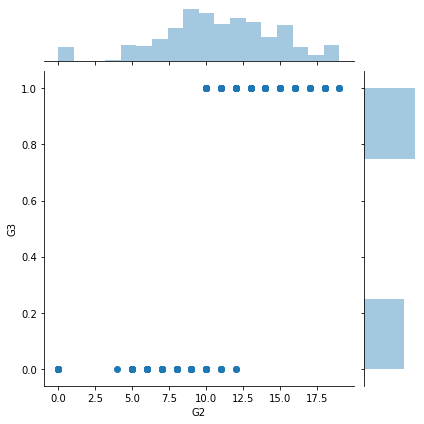

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.jointplot(x="G2", y="G3", data=df)


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

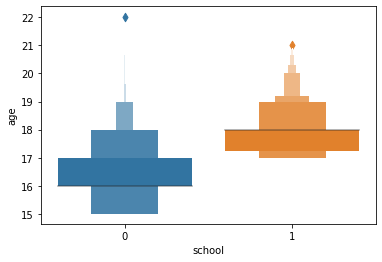

In [53]:
sns.boxenplot(x="school", y="age", data=X)

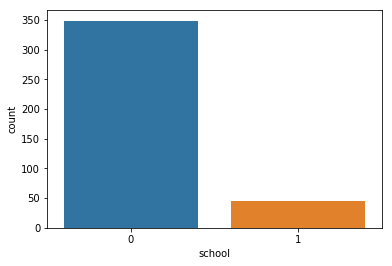

In [0]:
sns.countplot(x="school", data=df)

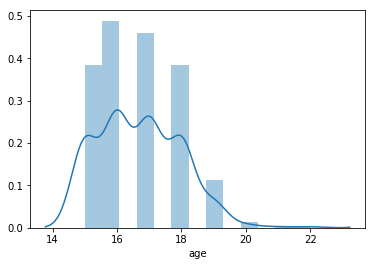

In [0]:
sns.distplot(df["age"])

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=300, random_state = 12)

In [0]:
X_train.shape

(300, 26)

In [0]:
y_train.shape

(300, 1)

In [0]:
X_test.shape

(95, 26)

In [0]:
y_test.shape

(95, 1)

## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [55]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
y_pred=lr.predict(X_test)

In [57]:
from sklearn.metrics import classification_report
target_names = ['Pass', 'Fail']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        Pass       0.98      0.95      0.96        42
        Fail       0.96      0.98      0.97        53

    accuracy                           0.97        95
   macro avg       0.97      0.97      0.97        95
weighted avg       0.97      0.97      0.97        95



# Naive bayes with Iris data

### Import Iris.csv

In [63]:
Iris= pd.read_csv("iris.csv")
Iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [64]:
Iris.fillna(value=0, inplace=True)
Iris.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
100,101,6.3,3.3,6.0,2.5,Iris-virginica
75,76,6.6,3.0,4.4,1.4,Iris-versicolor
67,68,5.8,2.7,4.1,1.0,Iris-versicolor
39,40,5.1,3.4,1.5,0.2,Iris-setosa
145,146,6.7,3.0,5.2,2.3,Iris-virginica
10,11,5.4,3.7,1.5,0.2,Iris-setosa
147,148,6.5,3.0,5.2,2.0,Iris-virginica
16,17,5.4,3.9,1.3,0.4,Iris-setosa
110,111,6.5,3.2,5.1,2.0,Iris-virginica
109,110,7.2,3.6,6.1,2.5,Iris-virginica


### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [65]:
X=Iris.drop("Species", axis=1)
y=Iris["Species"]

In [66]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [67]:
y=le.fit_transform(y.astype('str'))
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Find the distribution of target variable (Class)

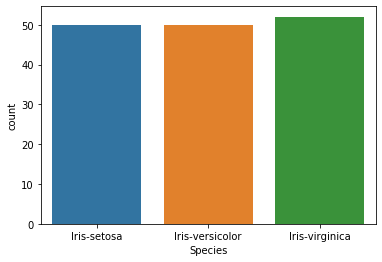

In [68]:
sns.countplot("Species", data=Iris)

### Plot the distribution of target variable using histogram

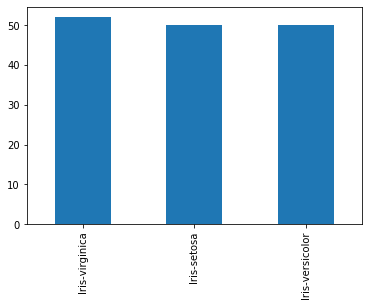

In [69]:
pd.value_counts(Iris["Species"]).plot(kind="bar")

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

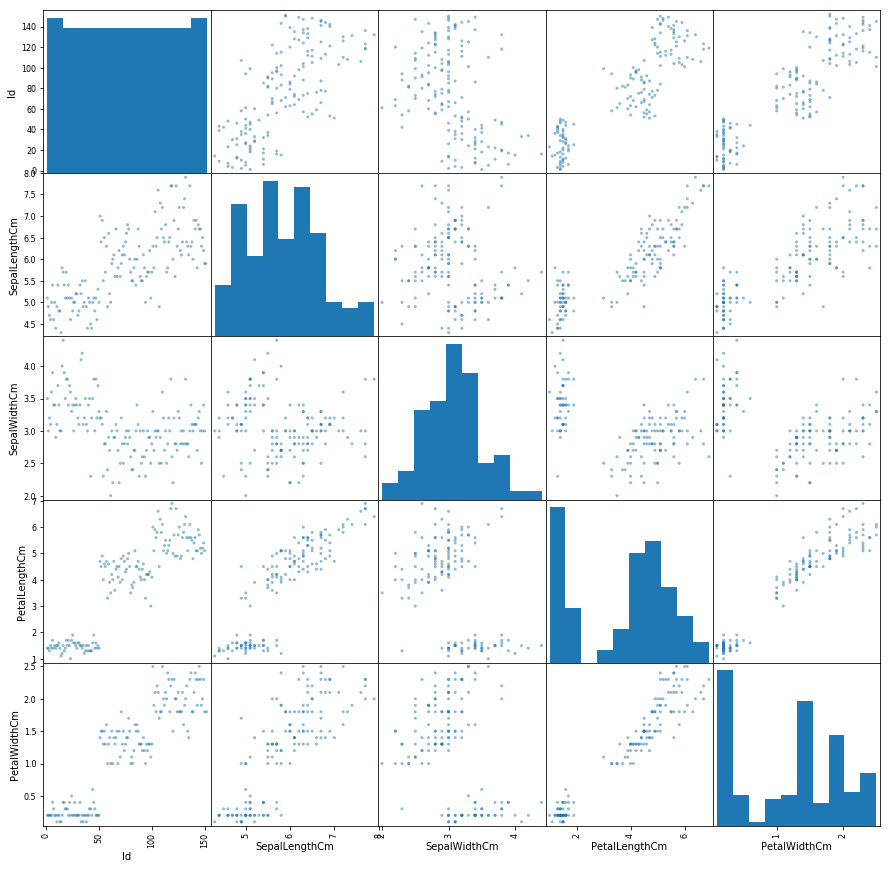

In [0]:
df0=pd.plotting.scatter_matrix(X, figsize=(15,15))

From this graph we can assume that **Petal Length** and **Petal width** are having good relationship in terms of classification.

### Summary Statistics and explain insights for at least 2 variables

In [59]:
X.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,152.000000,151.000000,150.000000,150.000000,151.000000
mean,76.500000,5.843709,3.054000,3.758667,1.202649
std,44.022721,0.825314,0.433594,1.764420,0.762185
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.750000,5.100000,2.800000,1.600000,0.300000
50%,76.500000,5.800000,3.000000,4.350000,1.300000
75%,114.250000,6.400000,3.300000,5.100000,1.800000
max,152.000000,7.900000,4.400000,6.900000,2.500000


In [65]:
Iris.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
Id               152 non-null int64
SepalLengthCm    151 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     151 non-null float64
Species          152 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Correlation among all variables and give your insights

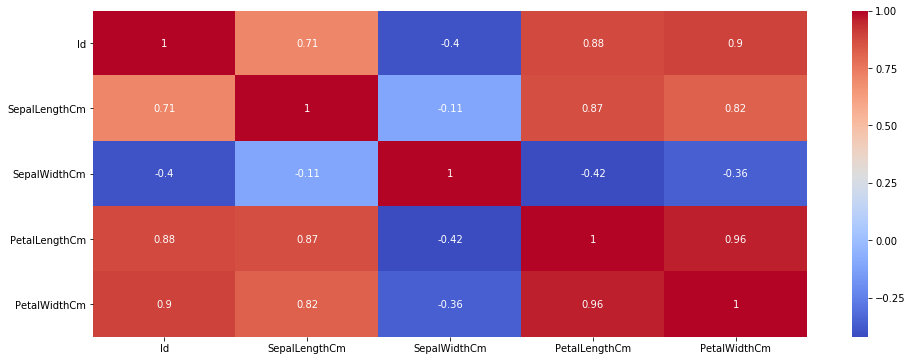

In [0]:
plt.figure(figsize=(16, 6))
sns.heatmap(Iris.corr(), annot=True, cmap='coolwarm')

Accordiing to the graph, the **Petal Width** and **Petal Length** are highly corelated.

### Split data in Training and Validation in 80:20

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 3)

### Do Feature Scaling

In [71]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
ScaledX_train = sc.fit_transform(X_train)
ScaledX_test = sc.transform(X_test)

### Train and Fit NaiveBayes Model

In [72]:
from sklearn.naive_bayes import GaussianNB

In [73]:
nb=GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [74]:
y_pred= nb.predict(X_test)

### Print Accuracy and Confusion Matrix and Conclude your findings

In [75]:
from sklearn.metrics import classification_report
target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
print(classification_report(y_test, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        31
      macro avg       1.00      1.00      1.00        31
   weighted avg       1.00      1.00      1.00        31



In [76]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[11,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]], dtype=int64)

According to the accuracy score, the model is very good in classification. In terms of statastics it is a over-fitting model.
There should be more features so that to reduce over fitting.